In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [37]:
train_data = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv")
test_data = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv")
validation_data = pd.read_csv("/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Val.csv")

In [38]:
test_data.head()

,Data,Label
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0
1,ভাইয়া নতুন ভিডিও আসে না কেন,0
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1


In [39]:
train_data.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0


In [40]:
validation_data.head()

,Data,Label
0,আর আমার খুবেই আনন্দ লাকছে ভাইটি চাকরি পেয়েছে,1
1,ভাই আমাদের আগের মেয়র আনিচুল হক নাই যে আমাদের ক...,2
2,আমি মার্ক ওয়েন আর সনির বিশাল ভক্ত । একটা সময় ভ...,1
3,৩ মাস না যেতেই একেকজন ফুলে ফেপে আলুর দম,2
4,"বাংলাদেশের পুলিশ হলো নিরীহ মানুষের যম , আর অত্...",2


# > **Label 0: neutral, 1:positive, 2:negative**

In [41]:
train_data = train_data.dropna()
test_data = test_data.dropna()
validation_data = validation_data.dropna()

In [42]:
train_data.shape


(12575, 2)

In [43]:
test_data.shape


(1586, 2)

In [44]:
validation_data.shape

(1567, 2)

In [45]:
train_data['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [46]:
test_data['Label'].value_counts()

Label
1    654
2    571
0    361
Name: count, dtype: int64

In [47]:
validation_data['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [48]:
train_data.info

<bound method DataFrame.info of                                                     Data  Label
0      মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...      1
1      এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...      2
2                              ভাই আপনার কথাই যাদু রয়েছে      1
3                            উওরটা আমার অনেক ভাল লেগেছে       1
4      আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...      0
...                                                  ...    ...
12570  বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...      1
12571  আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...      2
12572  ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...      1
12573  বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...      2
12574         বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু      2

[12575 rows x 2 columns]>

In [49]:
from transformers import AutoTokenizer, AutoModel
from transformers import BertForMaskedLM, BertTokenizer, pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [50]:
model_name = 'csebuetnlp/banglabert'
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [51]:
pip install git+https://github.com/csebuetnlp/normalizer

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-ki94_alw
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-ki94_alw
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [52]:
from transformers import AutoModelForPreTraining, AutoTokenizer
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer
import torch

In [53]:
given_text = "ভাই আপনার কথাই যাদু রয়েছে"

In [54]:
encoding = tokenizer.encode_plus(
  given_text,
  max_length=32,
  add_special_tokens=True, 
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  truncation=True,
  return_tensors='pt', 

)

encoding.keys()

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])

# Sequence Length

In [55]:
token_lens = []

for txt in train_data.Data:
  txt = normalize(txt) # this normalization step is required before tokenizing the text
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/tmp/ipykernel_34/1971794795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


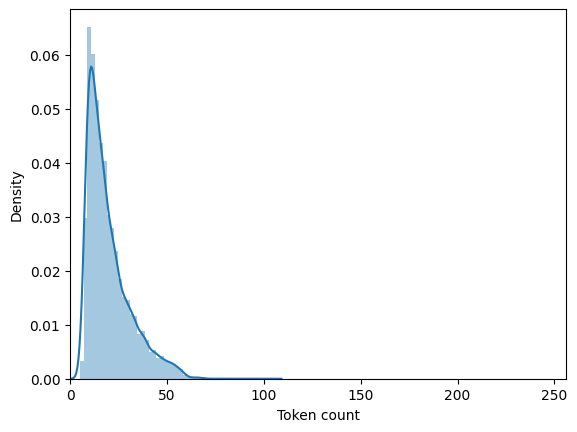

In [56]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [57]:
from transformers import AutoTokenizer, AutoModel
import torch

def encode_text(model_name, texts):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    encoded_input = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        model_output = model(**encoded_input)
    return model_output.last_hidden_state


In [58]:
MAX_LEN = 80

In [59]:
class GPReviewDataset(Dataset):

  def __init__(self, comments, targets, tokenizer, max_len):
    self.comments = comments
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.comments)
  def __getitem__(self, item):
    review = str(self.comments[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'Data': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [60]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    comments=df.Data.to_numpy(),
    targets=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len,

  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle=True
  )

In [61]:
BATCH_SIZE = 64

train_data_loader = create_data_loader(train_data, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(validation_data, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_data, tokenizer, MAX_LEN, BATCH_SIZE)

In [62]:
bert_model = AutoModelForPreTraining.from_pretrained(model_name)

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [63]:
class sentimentClassifier(nn.Module):

    def __init__(self, n_classes):
        super(sentimentClassifier, self).__init__()
        self.electra = AutoModelForPreTraining.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(80, n_classes)  # Adjust the input size

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict=True
        )
        pooled_output = outputs.logits  # Access logits for pooled output
        output = self.drop(pooled_output)
        return self.out(output)

In [64]:
class_names = 'positive','negative','neutral'

In [65]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [66]:
model = sentimentClassifier(len(class_names))
model = model.to(device)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacty of 15.89 GiB of which 22.12 MiB is free. Process 2329 has 15.87 GiB memory in use. Of the allocated memory 384.43 MiB is allocated by PyTorch, and 31.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [67]:
input_ids = Data['input_ids'].to(device)
attention_mask = Data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape)

NameError: name 'Data' is not defined

# **LSTM**

In [ ]:
!pip install git+https://github.com/csebuetnlp/normalizer

In [ ]:
import pandas as pd
import numpy as np
from normalizer import normalize
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.optimizers import SGD
from sklearn.metrics import classification_report
import tensorflow as tf

In [ ]:
train1 = train_data
test1 = test_data
valid1 = validation_data
embedding_dim = 300
trunc_type = 'post'
oov_tok = "<OOV>"

training_sentences = np.array([normalize(sentence) for sentence in train1['Data'].values])
testing_sentences = np.array([normalize(sentence) for sentence in test1['Data'].values])
valid_sentences = np.array([normalize(sentence) for sentence in valid1['Data'].values])
total_vocab_size = len(set([word for sentence in training_sentences for word in sentence.split()]))
vocab_size_percentage = 0.9
vocab_size = int(total_vocab_size * vocab_size_percentage)
vocab_size += 1
print(f"Calculated Vocabulary Size: {vocab_size}")
sentence_lengths = [len(sentence.split()) for sentence in training_sentences]
max_length_percentile = 95
max_length = int(np.percentile(sentence_lengths, max_length_percentile))
print(f"Calculated Max Sequence Length: {max_length}")

train_labels = keras.utils.to_categorical(train1['Label'].values)
test_labels = keras.utils.to_categorical(test1['Label'].values)
valid_labels = keras.utils.to_categorical(valid1['Label'].values)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(training_sentences)
padded_train = pad_sequences(sequences_train, maxlen=max_length, truncating=trunc_type)

sequences_test = tokenizer.texts_to_sequences(testing_sentences)
padded_test = pad_sequences(sequences_test, maxlen=max_length)

sequences_valid = tokenizer.texts_to_sequences(valid_sentences)
padded_valid = pad_sequences(sequences_valid, maxlen=max_length)

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(40))
model.add(Dense(3,activation='softmax'))

initial_learning_rate = 2e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=1e-6)
# Compile the model with Adam optimizer with weight decay
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train, train_labels, epochs=25,batch_size=32,validation_data=(padded_valid, valid_labels))
    # Evaluate the model on the test set
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print the classification report
print(classification_report(np.argmax(test_labels, axis=1), predicted_labels))

# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report


vocab_size = 10000  
embedding_dim = 100 
max_length = 200  


model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  
model.add(GlobalMaxPooling1D())  # Pooling layer to reduce dimensionality
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes


initial_learning_rate = 2e-5
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule, epsilon=1e-6)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
history = model.fit(padded_train, train_labels, epochs=25, batch_size=8, validation_data=(padded_valid, valid_labels))

# Evaluate the model on the test set
predictions = model.predict(padded_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print the classification report
print(classification_report(np.argmax(test_labels, axis=1), predicted_labels))
